In [4]:
import sympy as sp

# Initialize LaTeX printing
sp.init_printing(use_latex=True)

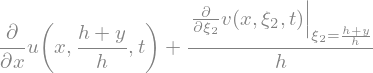

In [5]:
### 2D SYSTEM ###

# Define the symbols
x, y, t = sp.symbols('x y t')

h = sp.symbols('h')

d = 0 + h

# Define sigma as a function of x
sigma = (y + h) / d

# Define a function p
u = sp.Function('u')(x, sigma, t)
v = sp.Function('v')(x, sigma, t)
p = sp.Function('p')(x, sigma, t)

# Helper function for creating operators
def create_operator(var):
    operator = sp.Derivative(p, var)
    operator = sp.Derivative(operator, var)
    return operator

# Create and compute operators
x_operator = create_operator(x)
y_operator = create_operator(y)

# Combine results
#result = x_operator + y_operator
result = sp.Derivative(u,x) + sp.Derivative(v,y)

# Expand and then simplify the result
result = sp.expand(result)
result = sp.simplify(result)

# Display the result
display(result)

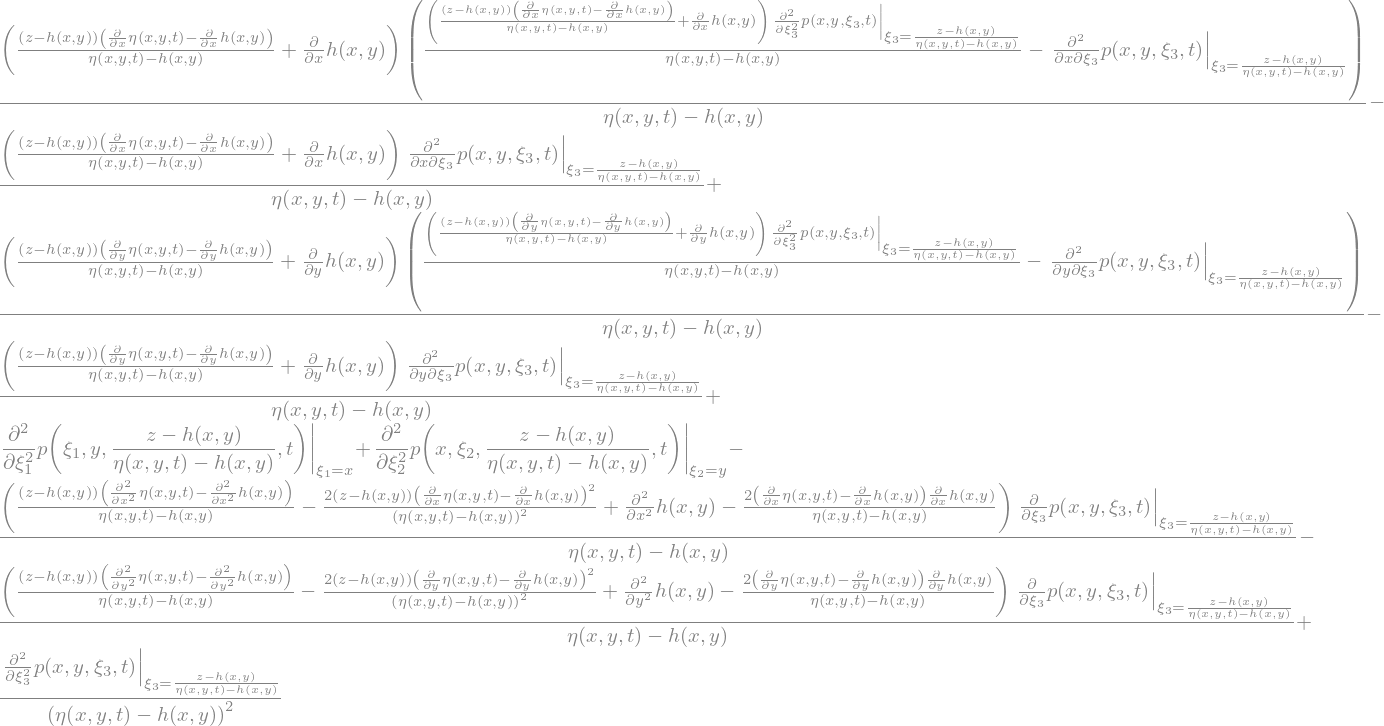

In [6]:
### 3D SYSTEM ###

# Define the symbols
x, y, z, t = sp.symbols('x y z t')

h = sp.Function('h')(x, y)
eta = sp.Function('eta')(x, y, t)

d = eta - h

# Define sigma as a function of x, y, z, t
sigma = (z - h) / d

# Define a function p
p = sp.Function('p')(x, y, sigma, t)

# Helper function for creating operators
def create_operator(var):
    operator = sp.Derivative(p, var)
    operator = sp.Derivative(operator, var)
    return operator

# Create and compute operators
x_operator = create_operator(x)
y_operator = create_operator(y)
z_operator = create_operator(z)

# Combine results
result = x_operator + y_operator + z_operator

# Expand and then simplify the result
result = sp.expand(result)
result = sp.simplify(result)

# Display the result
display(result)